In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
#import module for train and test split
from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures

In [39]:
#Load cast dataset
cast_df = pd.read_csv("cast.csv",low_memory=False)

## Cast dataset preprocessing

### Handling null values - cast dataset

In [40]:
#As most of the values in below mentioned columns are null, drop these columns
cast_df.drop(['Data_Or','Order_Occ','Cruz_Leg','IntChl','IntC14','Inc_Str','Inc_End','PST_LAN',
              'Civil_T','ForelU','Secchi','Cloud_Amt','Cloud_Typ','Wave_Prd','Wave_Ht','TimeZone',
              'Wave_Dir','Wea','Barometer','Dry_T','Wet_T','Distance','Visibility','Bottom_D'],axis=1,inplace=True)

#Fill null values 
cast_df.fillna({"Wind_Spd":0,
                "Wind_Dir":cast_df["Wind_Dir"].mean()},inplace=True)

### Data cleaning(dashes, odd characters etc)

In [41]:
cast_df['Date'] = pd.to_datetime(cast_df["Date"])
cast_df['Month'] = cast_df["Date"].dt.month
cast_df['Day'] = cast_df["Date"].dt.day
cast_df['Year'] = cast_df["Date"].dt.year

cast_df.drop(['Date'],axis=1,inplace=True)

## Convert categorical values to numerical

In [42]:
class_labels = LabelEncoder()
#Label encode Ship_Name
cast_df["Ship_Name"] = cast_df["Ship_Name"].astype(str)
cast_df["Ship_Name"] = class_labels.fit_transform(cast_df["Ship_Name"].values)


In [43]:
cast_df["Ship_Name"]

0         2
1         2
2         2
3         2
4         2
         ..
34399    27
34400    27
34401    27
34402    27
34403    27
Name: Ship_Name, Length: 34404, dtype: int32

### One hot encode- Cast dataset

In [44]:
onehot_encode_df = pd.get_dummies(cast_df[['Data_Type','Sta_Code','Ship_Code']])
onehot_encode_df

,Data_Type_10,Data_Type_CT,Data_Type_HY,Data_Type_MX,Data_Type_PR,Sta_Code_IMX,Sta_Code_MBR,Sta_Code_NRO,Sta_Code_NST,Sta_Code_OCO,...,Ship_Code_32OC,Ship_Code_32QU,Ship_Code_32WC,Ship_Code_33DP,Ship_Code_33RL,Ship_Code_33RR,Ship_Code_33SR,Ship_Code_57VA,Ship_Code_90EK,Ship_Code_90PN
0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34400,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34401,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
34402,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Cast dataset - Heatmap
corr() gives Pearson's correlation coefficient by default, which is linear correlation that measures the linear relationship between variables
If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.
The color map that is used for below heatmap is 'RdBu', where dark shade of blue is postitive correlation and dark shade of red is negative correlation. Lighter shades of blue and red are very less or not correlated. Positive correlation is where if one value increases the other value increases too showing the linear correlation of line going up if we try to draw line between the scatter plot.

* Positive correlation
    - Correlation between the same feature is always strongly postitive which you see as all the diagonal values are 1
    - Cst_Cnt and 
    - Cruise and Cst_Cnt has strong positive correlation of 0.98
    - Cruz_Sta and Cst_Cnt has strong positive correlation of 0.98
    - Year,Julian_Date and Cst_Cnt has strong positive correlation of 0.98
    - Year and Cruise,Criz_Sta has strong positive correlation of 1
    - Year and Cruise has strong positive correlation of 1
    - Year and Cruz_Sta has strong positive correlation of 0.98
    - Julian_Date and Cruise has strong positive correlation of 0.99
    - Julian_Date and Cruz_Sta has strong positive correlation of 0.99
    - Month and Julian_date has strong positive correlation of 0.97
    - Rpt_Line,Ac_line and DbSta_ID has strong positive correlation of 1
    - Lon_Dec, Lon_Deg and DbSta_ID has positive correlation greater than 0.80
    - Ac_line and Rpt_Line has strong positive correlation of 1
    - Lon_Dec and Lon_Deg has strong positive correlation of 1
    - St_Station and Rpt_Sta has strong positive correlation of 1

* Negative correlation
    - DBSta_ID and Lat_Dec,Lat_Deg has negative correlation of -0.96
    - Rpt_Line and Lat_Dec,Lat_Deg has negative correlation of -0.96
    - Ac_Line and Lat_Dec,Lat_Deg has negative correlation of -0.96


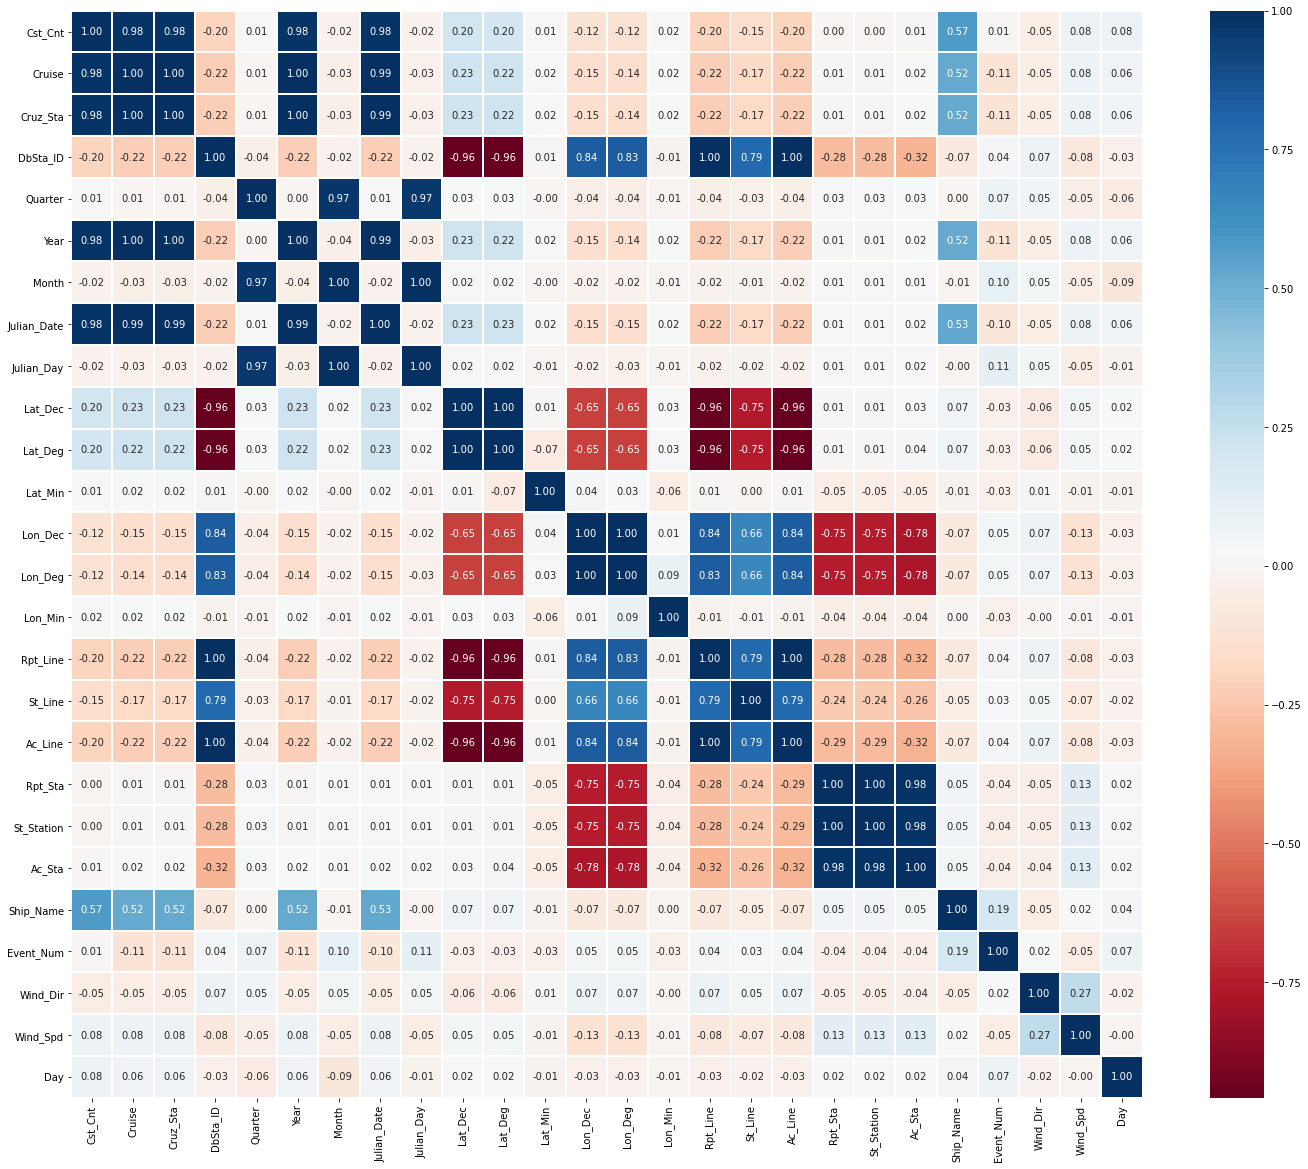

In [45]:
plt.figure(figsize=(24,20))
sns.heatmap(cast_df.corr(),cmap="RdBu",annot=True,linewidth=1,fmt=".2f")
plt.show()

## Cast dataset -  removing highly correlated and redundant features

In [46]:
#removing some of features that are highly correlated
#Lat_Hem has value 'N' for all the records,
#Lon_Hem has 'W' for all the records
cast_df.drop(['Julian_Date','Julian_Day','Cst_Cnt','Cruise','Quarter',
              'DbSta_ID','Lon_Dec','Ac_Line','St_Station','Lat_Hem','Lon_Hem'],axis=1,inplace=True)

### Handle multicollinearity - cast dataset

In [47]:
cast_df = pd.concat([cast_df,onehot_encode_df],axis=1)
#removing multicollinearity from one hot encoding
cast_df.drop(['Data_Type','Data_Type_PR','Sta_Code','Sta_Code_SCO','Ship_Code','Ship_Code_90PN'],axis=1,inplace=True)

In [48]:
cast_df.head()

,Cruise_ID,Cruz_Sta,Cast_ID,Sta_ID,Year,Month,Time,Lat_Dec,Lat_Deg,Lat_Min,...,Ship_Code_32NM,Ship_Code_32OC,Ship_Code_32QU,Ship_Code_32WC,Ship_Code_33DP,Ship_Code_33RL,Ship_Code_33RR,Ship_Code_33SR,Ship_Code_57VA,Ship_Code_90EK
0,1949-03-01-C-31CR,19490305400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1949,3,09:30:00,38.833333,38,50.0,...,0,0,0,0,0,0,0,0,0,0
1,1949-03-01-C-31CR,19490305200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1949,3,21:12:00,38.583333,38,35.0,...,0,0,0,0,0,0,0,0,0,0
2,1949-03-01-C-31CR,19490305100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1949,3,03:54:00,38.475000,38,28.5,...,0,0,0,0,0,0,0,0,0,0
3,1949-03-01-C-31CR,19490305000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1949,3,10:42:00,38.333333,38,20.0,...,0,0,0,0,0,0,0,0,0,0
4,1949-03-01-C-31CR,19490305001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1949,3,17:06:00,38.233333,38,14.0,...,0,0,0,0,0,0,0,0,0,0


## Bottle dataset preprocessing

In [11]:
#load bottle dataset
bottle_df = pd.read_csv("bottle.csv",low_memory=False)

## Handling null values

In [12]:
#Get the column names where null value count is greater than 100000
#There are 50 columns that match this criteria
null_cnt_df = pd.DataFrame(bottle_df.isnull().sum())
null_cnt_df.columns = ['Sum']
null_cnt_df = null_cnt_df[null_cnt_df['Sum']>100000]
null_cnt_df.T.columns


Index(['O2ml_L', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'T_qual', 'S_qual',
       'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop',
       'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM',
       'NO3q', 'NH3uM', 'C14As1', 'C14A1p', 'C14As2', 'C14A2p', 'DarkAs',
       'DarkAp', 'MeanAs', 'MeanAp', 'IncTim', 'LightP', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1',
       'DIC Quality Comment'],
      dtype='object')

In [13]:
#drop those null value columns from above step
bottle_df.drop(null_cnt_df.T.columns,axis=1,inplace=True)

## Bottle dataset heatmap
corr() gives Pearson's correlation coefficient by default, which is linear correlation that measures the linear relationship between variables
If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.
The color map that is used for below heatmap is 'RdBu', where dark shade of blue is postitive correlation and dark shade of red is negative correlation. Lighter shades of blue and red are very less or not correlated. Positive correlation is where if one value increases the other value increases too showing the linear correlation of line going up if we try to draw line between the scatter plot.

* Positive correlation
    - Correlation between the same feature is always strongly postitive which you see as all the diagonal values are 1
    - Cst_Cnt and Bill_Cnt has positive correlation of 1
    - R_Depth and Depthm has positive correlation of 1
    - R_PRES and Depthm has positive correlation of 1
    - T_DegC and R_Temp, R_POTEMP has positive correlation of 1
    - T_DegC and R_SVA has positive correlation of 0.96
    - R_Salinity and Salnty has positive correlation of 1
    - R_SIGMA and STheta has positive correlation of 0.96
    - C14A2q,DarkAq,MeanAq and C14A1q has strong positive correlation of 1

* Negative correlation
    - R_SVA and Depthm has negative correlation of -0.67
    - R_Temp and Salnty has negative correaltion of -0.51
    - STheta and T_DegC has negative correaltion of -0.83

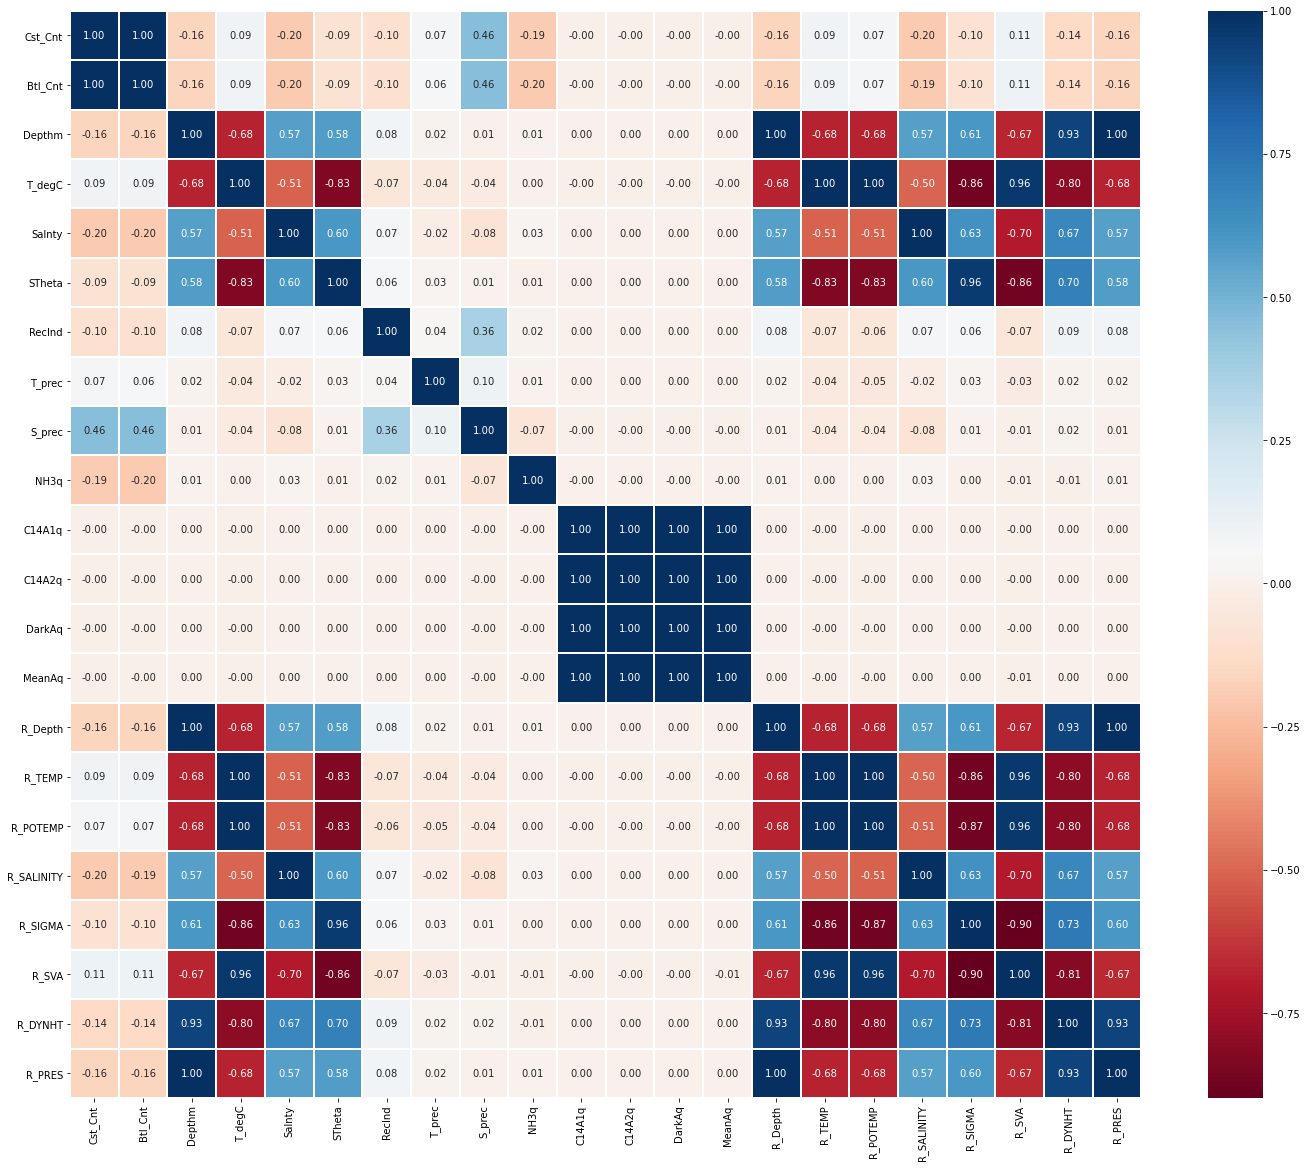

In [14]:
bottle_df.head()
plt.figure(figsize=(24,20))
sns.heatmap(bottle_df.corr(),cmap="RdBu",annot=True,linewidth=1,fmt=".2f")
plt.show()

### Removing columns that are highly correlated

In [15]:
cols_to_drop = ['Btl_Cnt','Depthm','R_TEMP','R_POTEMP','R_SALINITY','R_SIGMA','DarkAq','MeanAq']
bottle_df.drop(cols_to_drop,axis=1,inplace=True)

In [16]:
#Fill null values with mode
bottle_df.fillna(value = {"T_prec":bottle_df["T_prec"].mode()[0],
                  "S_prec":bottle_df["S_prec"].mode()[0],
                  "NH3q":bottle_df["NH3q"].mode()[0],
                  "C14A1q":bottle_df["C14A1q"].mode()[0],
                  "C14A2q":bottle_df["C14A2q"].mode()[0]},inplace=True)

#Convert float data type to integer as values are all integer but stored as float
bottle_df[['RecInd','T_prec','S_prec','NH3q','C14A1q','C14A2q','R_PRES']] = bottle_df[['RecInd','T_prec','S_prec','NH3q','C14A1q','C14A2q','R_PRES']].astype(int)

print(bottle_df.isnull().sum())
bottle_df.head()

Cst_Cnt         0
Sta_ID          0
Depth_ID        0
T_degC      10963
Salnty      47354
STheta      52689
RecInd          0
T_prec          0
S_prec          0
NH3q            0
C14A1q          0
C14A2q          0
R_Depth         0
R_SVA       52771
R_DYNHT     46657
R_PRES          0
dtype: int64


,Cst_Cnt,Sta_ID,Depth_ID,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,NH3q,C14A1q,C14A2q,R_Depth,R_SVA,R_DYNHT,R_PRES
0,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,10.50,33.440,25.649,3,1,2,9,9,9,0.0,233.0,0.00,0
1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,10.46,33.440,25.656,3,2,2,9,9,9,8.0,232.5,0.01,8
2,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10.46,33.437,25.654,7,2,3,9,9,9,10.0,232.8,0.02,10
3,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,10.45,33.420,25.643,3,2,2,9,9,9,19.0,234.1,0.04,19
4,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,10.45,33.421,25.643,7,2,3,9,9,9,20.0,234.0,0.04,20


## Handling missing values in Temperature and Salinity

In [17]:
temp_salnty_df=bottle_df[['Salnty','T_degC']]
temp_salnty_df.head()


,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [18]:
print(temp_salnty_df.shape)

(864863, 2)


In [19]:
temp_salnty_df.isnull().sum() 

Salnty    47354
T_degC    10963
dtype: int64

In [20]:
#drop the null values of Salinity and temperature
temp_salnty_df.dropna(thresh=2,inplace=True)
temp_salnty_df.isnull().sum()

<ipython-input-20-9cc0dc4d3ed9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_salnty_df.dropna(thresh=2,inplace=True)


Salnty    0
T_degC    0
dtype: int64

In [21]:
#Take only 5000 records of Salinity and Temperature
temp_salnty_df = temp_salnty_df[:][:5000]
print(temp_salnty_df.shape)

(5000, 2)


In [22]:
X_salinity = temp_salnty_df["Salnty"].values
y_temp = temp_salnty_df["T_degC"].values

X_salinity= X_salinity.reshape(-1,1)
#y_temp= y_temp.reshape(-1,1)

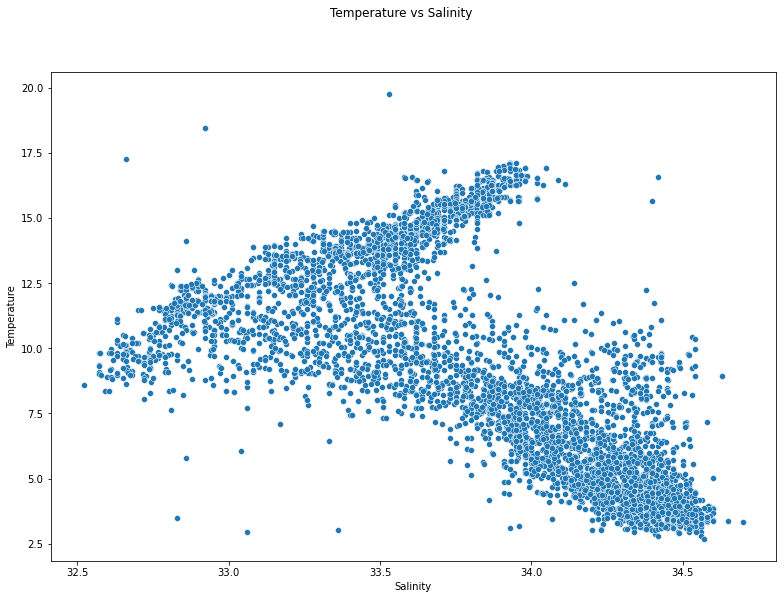

In [25]:
plt.figure(figsize=(13,9))
sns.scatterplot(x=temp_salnty_df["Salnty"], y=temp_salnty_df["T_degC"])
plt.suptitle("Temperature vs Salinity")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

## 3 & 4. Perform linear regression, find mean squared error and R square values 
#### Mean Squared Error and R^2 values
* Mean Squared Error - Is the average of the sqaures of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values and predicted values.There is no correct answer for MSE but lower the value of MSE its better. Predicted values of temperature and acutal values of temperature MSE is as below:
    - Mean Squared Error: 8.460170488311233

* R Sqaure
    - R^2: 0.4255818269267334 this is same as calculating accuracy. The predicted values are 42% accurate. 

In [26]:
#Linear regression splitting into training and test data

In [27]:
#test_size=0.3 implies that the test part of the data will be 30%
X_train,X_test,y_train,y_test=train_test_split(X_salinity, y_temp, test_size = 0.3, random_state = 21)

In [28]:
reg = LinearRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

#Accuracy
print("Accuracy {}".format(reg.score(X_test,y_test)))

#R2 value for linear regression
print("R^2: {}".format(r2_score(y_test,y_pred)))

#Mean Squared Error
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error: {}".format(mse))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))

Accuracy 0.4255818269267334
R^2: 0.4255818269267334
Mean Squared Error: 8.460170488311233
Root Mean Squared Error: 2.908637221846553


## 5. Relationship between water temp and salinity. Show trend line with predicted temperature values

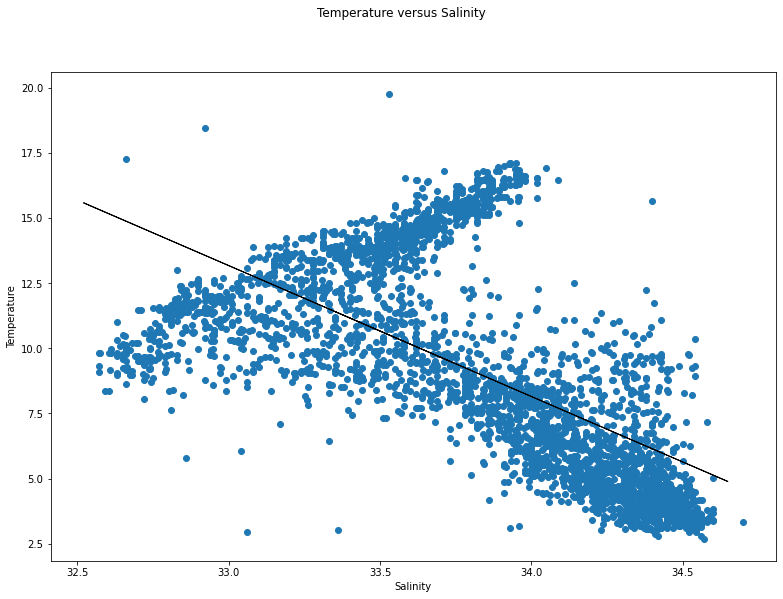

In [29]:
plt.figure(figsize=(13,9))
plt.scatter(x=X_train, y=y_train)
plt.plot(X_test,y_pred,color='black',linewidth=1)
plt.suptitle('Temperature versus Salinity')
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()


## 6. Describe Polynomial Regression
* Polynomial Regression
    - If the data points doesn't clearly fit the linear regression i.e a straight line through data points, it may be ideal for polynomial regression
    - Polynomial regression uses the relationship between the variables to find the best way to draw a line through data points
    - Linear algorithms such as linear and logistics regression respond well to use of polynomial input feature. Adding polynomial feature can be an effective way of allowing the model to indentify non-linear pattern
    - When using polynomial features in linear regression it is called Polynomial regression

* Polynomial Features
    - Polynomial features transforms by raising existing features to an exponent and create new version of input variables for predictive modeling
    - Polynomial feature is a type of feature engineering where you create new input feature from existing one
    - Adding polynomial features can result in improved performance

* Degree of the polynomial
    - Degree of polynomial impacts the number of features created by transform
    - Typically a small degree 2 or 3 is used. It unusal to use higher degree as it can result in overfitting.
    
    
* Please see below for example of 

In [30]:
#define sample dataset
X_test_dataset = np.asarray([[2],[4],[5]])
print(X_test_dataset)

#perform a polynomial features transform of the dataset for degree ranging from 1 to 5
degrees = [i for i in range(1,6)]
for d in degrees:
    poly_features = PolynomialFeatures(degree=d) 
    test_dataset = poly_features.fit_transform(X_test_dataset)
    print('Degree:', d , 'Features:', test_dataset.shape)
    print(test_dataset)

# As the degree goes up, number of features dramatically goes up

[[2]
 [4]
 [5]]
Degree: 1 Features: (3, 2)
[[1. 2.]
 [1. 4.]
 [1. 5.]]
Degree: 2 Features: (3, 3)
[[ 1.  2.  4.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]
Degree: 3 Features: (3, 4)
[[  1.   2.   4.   8.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]
Degree: 4 Features: (3, 5)
[[  1.   2.   4.   8.  16.]
 [  1.   4.  16.  64. 256.]
 [  1.   5.  25. 125. 625.]]
Degree: 5 Features: (3, 6)
[[1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]]


In [31]:
#Polynomial regression

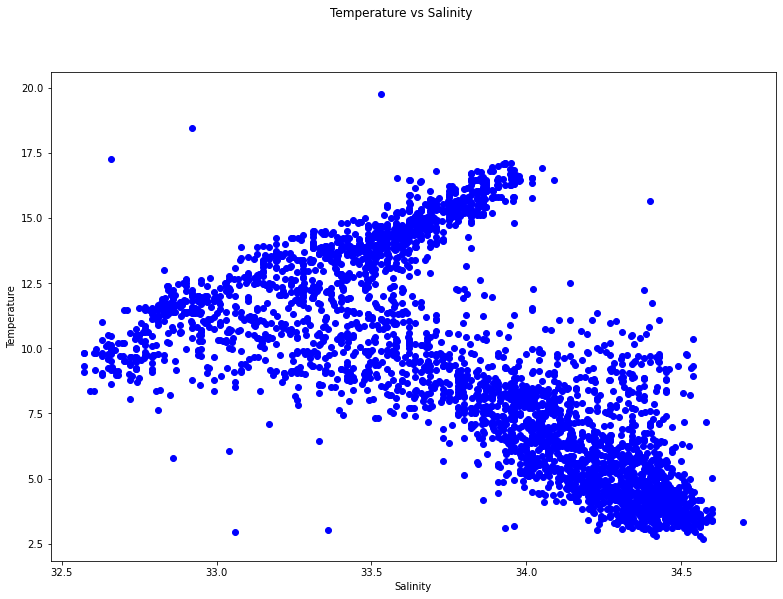

In [34]:
plt.figure(figsize=(13,9))
#using the train and test data created using train_test_split
plt.scatter(X_train,y_train,color='blue')

#Without using split 
#plt.scatter(X_salinity,y_temp,color='blue')
plt.suptitle("Temperature vs Salinity")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

In [35]:
poly_reg = PolynomialFeatures(degree=3)
linreg = LinearRegression()

#using the train and test data created using train_test_split
#X_poly = poly_reg.fit_transform(X_train)
#poly_reg.fit(X_poly,y_train)
#linreg.fit(X_poly,y_train)

#Without using split 
X_poly = poly_reg.fit_transform(X_salinity)
poly_reg.fit(X_poly,y_temp)
linreg.fit(X_poly,y_temp)


LinearRegression()

In [36]:
prediction_temp_poly = linreg.predict(poly_reg.fit_transform([[32.546]]))
prediction_temp_poly

array([6.75870014])

### Mean Squared Error and R^2 values
* Mean Squared Error is the average of the sqaures of the errors. The larger the number the larger the error. Error in this case means the difference between the observed values and predicted values.There is no correct answer for MSE but lower the value of MSE its better. Predicted values of temperature and acutal values of temperature MSE is as below which is lower than the linear regression model.
    - Mean Squared Error: R^2: 6.016453703873993

* R Square
    - R^2: 0.5995609258276697 which is same as accuracy calculation

In [37]:
'''
#using the train and test data created using train_test_split
#Accuracy
print("R^2: {}".format(linreg.score(poly_reg.fit_transform(X_test),y_test)))

#R2 value for Polynomial regression
print("R^2: {}".format(r2_score(y_test,linreg.predict(poly_reg.fit_transform(X_test))))

#Mean Squared Error
mse = mean_squared_error(y_test,linreg.predict(poly_reg.fit_transform(X_test)))
print("Mean Squared Error: {}".format(mse))

#Root Mean sqaured Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))
'''


#Without using split 
#Accuracy
print("Accuracy: {}".format(linreg.score(poly_reg.fit_transform(X_salinity),y_temp)))

#R2 value for Polynomial regression
print("R^2: {}".format(r2_score(y_temp,linreg.predict(poly_reg.fit_transform(X_salinity)))))

#Mean Squared Error
mse = mean_squared_error(y_temp,linreg.predict(poly_reg.fit_transform(X_salinity)))
print("Mean Squared Error: {}".format(mse))

#Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error: {}".format(rmse))


Accuracy: 0.5995609258276697
R^2: 0.5995609258276697
Mean Squared Error: 6.016453703873993
Root Mean Squared Error: 2.452846041616553


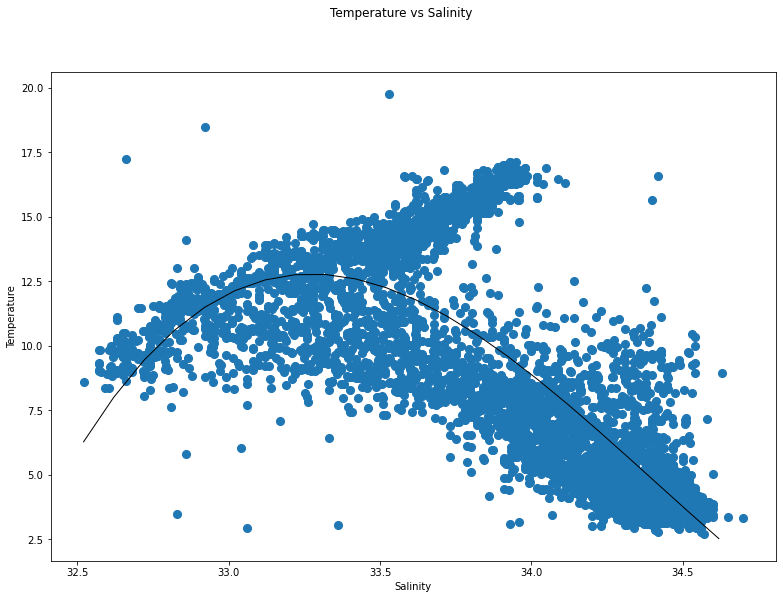

In [38]:
plt.figure(figsize=(13,9))

#Using the train and test data created using train_test_split
#x_grid = np.arange(min(X_train),max(X_train),0.1)
#x_grid = x_grid.reshape(-1,1)
#plt.scatter(x=X_train,y=y_train, s=65)
#plt.plot(x_grid, linreg.predict(poly_reg.fit_transform(x_grid)),color='black',linewidth=1)
##plt.plot(X_test, linreg.predict(poly_reg.fit_transform(X_test)),color='black',linewidth=0.5)

#Without using split
x_grid = np.arange(min(X_salinity),max(X_salinity),0.1)
plt.scatter(x=X_salinity,y=y_temp, s=65)
plt.plot(x_grid, linreg.predict(poly_reg.fit_transform(x_grid.reshape(-1, 1))),color='black',linewidth=1)
##plt.plot(X_salinity, linreg.predict(poly_reg.fit_transform(X_salinity)),color='black',linewidth=0.5)

plt.suptitle("Temperature vs Salinity")
plt.xlabel("Salinity")
plt.ylabel("Temperature")
plt.show()

## Accuracy of data
When taken 5000 records, and split into train and test 70% to 30% 
- linear regression R^2: 0.4255818269267334
- polynomial R^2: 0.5995609258276697

When taken 10000 records, and split into train and test 70% to 30% 
- linear regression R^2: 0.4197186103543863
- polynomial R^2: 0.6019485385877807

When taken 20000 records, and split into train and test 70% to 30% 
- linear regression R^2: 0.3903003205569573
- polynomial R^2: 0.5011620106176469

When taken 1000 records, and split into train and test 70% to 30% 
- linerar regression = R^2: 0.7025832868957473
- polynomial accuracy = R^2: 0.8312527943505363

When taken 814247 records and split into train and test 70% to 30% 
- linear regression = R^2: 0.2544309253184054
When taken 814247 records and without splitting
- polynomial accuracy =R^2: 0.38193235969379824
